# LAB 6

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# EXERCITIUL 1

# sinc(B,t) = sin(pi*B*t)/(pi*B*t)

def x(t, B=1):
    return (np.sinc(B*t))**2

t = np.arange(-3, 3, 0.0002)

x_cont = x(t, B=1)

[-2. -1.  0.  1.  2.]
[-2.66666667 -2.         -1.33333333 -0.66666667  0.          0.66666667
  1.33333333  2.          2.66666667]
[-2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
[-2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.
  0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75]


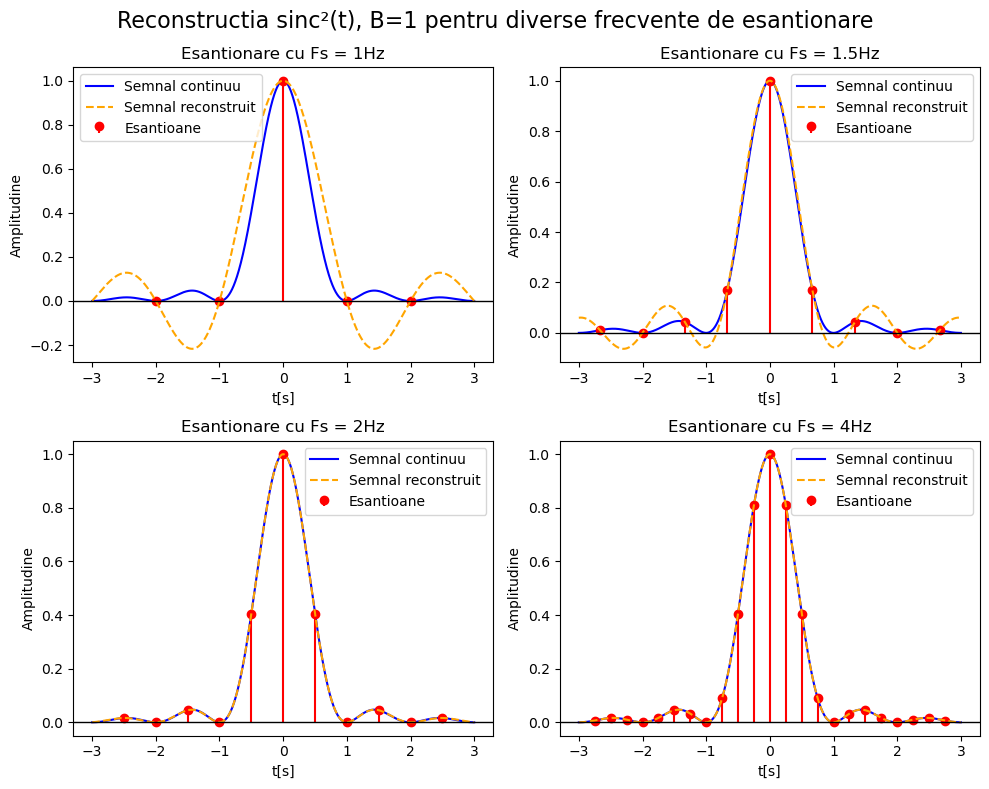

In [13]:
Fs_list = [1, 1.5, 2, 4]  # frecventele cu care o sa esantionez
#fig, axs = plt.subplots(len(Fs_list), 1, figsize=(7, 9), sharex=True)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
axs = axs.flatten() #ca sa pot itera liniar prin cele 4 ax-uri; altfel axs ar fi o matrice 2 x 2

fig.suptitle(f"Reconstructia sinc²(t), B={1} pentru diverse frecvente de esantionare", fontsize=16)

for ax, Fs in zip(axs, Fs_list):
    Ts = 1 / Fs
    
    momente_esantionare_pozitive = np.arange(0, 3, Ts)
    #print(indici_esantionare_pozitivi) #generez 0, Ts, 2Ts, ... pana la 3)
    
    momente_esantionare_negative = momente_esantionare_pozitive[:0:-1] * -1 
    #print(indici_esantionare_negativi)
    #pe partea negativa, inversez vectorul de esantioane pozitive, dar il exclud pe 0, pentru ca il am deja de la cei pozitivi
    
    # asa ma asigur ca 0 e mereu esantionat
    # concatenam cele 2 parti pentru a obtine esantioanele finale
    momente_esantionare = np.concatenate((momente_esantionare_negative, momente_esantionare_pozitive))
    print(momente_esantionare)
    
    xn = x(momente_esantionare) # esantioanele
    
    # SEMNALUL CONTINUU (FUNCTIA ORIGINALA SINC^2)
    ax.plot(t, x_cont, label='Semnal continuu', color='blue')                           

    # ESANTIOANELE
    ax.stem(momente_esantionare, xn, linefmt='r-', markerfmt='ro', basefmt=' ', label='Esantioane')

    # FUNCTIA RECONSTRUITA (SUMA DE SINCURI)
    x_reconstruit = np.zeros_like(t) # array de zerouri cu aceeasi dimensiune ca t
    
    for n, tn in enumerate(momente_esantionare):
        x_reconstruit += xn[n] * np.sinc((t - tn) / Ts)
                                        #t si tn sunt vectori, tn = n * Ts
                                                                #= indice_esantion * per. dintre 2 esantioane consec.

    ax.plot(t, x_reconstruit, label='Semnal reconstruit', color='orange', linestyle='--')

    ax.set_title(f'Esantionare cu Fs = {Fs}Hz')
    ax.legend()
    
    ax.set_xlabel("t[s]")
    ax.set_ylabel("Amplitudine")
    
    ax.axhline(0, color='black', linewidth=1) #axa Ox

axs[-1].set_xlabel("t[s]")
plt.tight_layout()
plt.savefig("1_reconstructia_sinc2_diverse_Fs.pdf")
plt.show()


[-2. -1.  0.  1.  2.]
[-2.66666667 -2.         -1.33333333 -0.66666667  0.          0.66666667
  1.33333333  2.          2.66666667]
[-2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
[-2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.
  0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75]


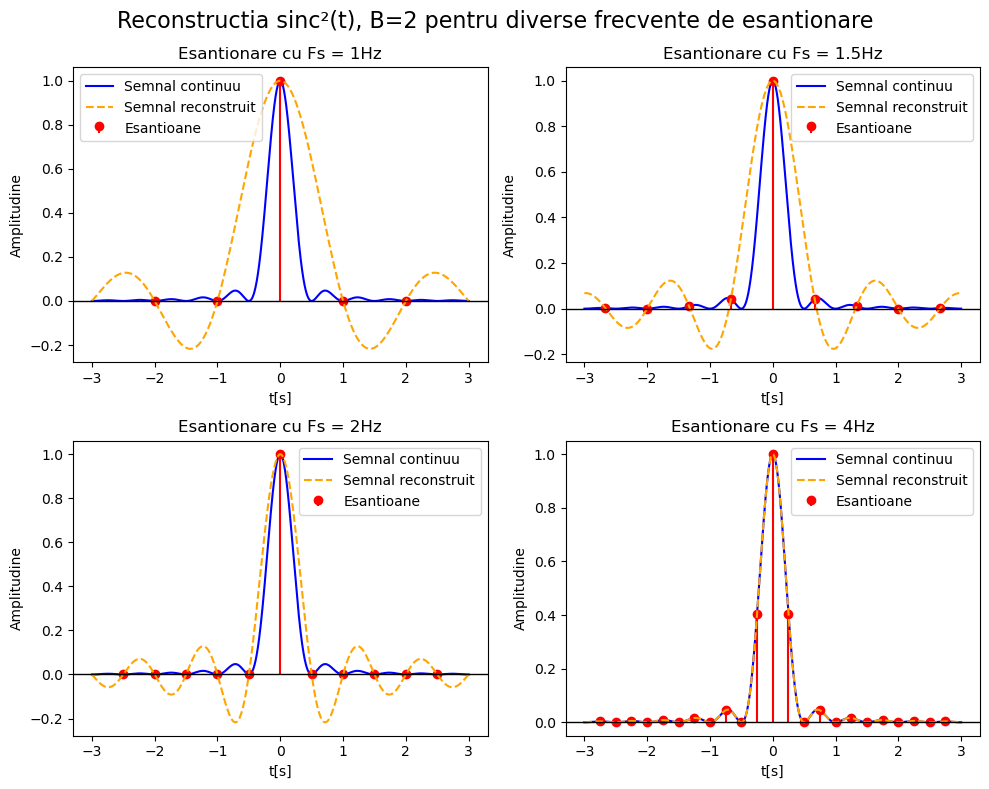

In [ ]:
#1.d.
# Alta valoare a lui B in sinc(B,t)

#-----------------------------------------------------------------------------------------------------------
# Ce se intampla: sinc^2(t) se "ingusteaza" pe masura ce B creste
#-----------------------------------------------------------------------------------------------------------

x_cont = x(t, B=2)

Fs_list = [1, 1.5, 2, 4]  # frecventele cu care o sa esantionez
#fig, axs = plt.subplots(len(Fs_list), 1, figsize=(7, 9), sharex=True)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False)
axs = axs.flatten() #ca sa pot itera liniar prin cele 4 ax-uri; altfel axs ar fi o matrice 2 x 2

fig.suptitle(f"Reconstructia sinc²(t), B={2} pentru diverse frecvente de esantionare", fontsize=16)

for ax, Fs in zip(axs, Fs_list):
    Ts = 1 / Fs
    
    momente_esantionare_pozitive = np.arange(0, 3, Ts)
    #print(indici_esantionare_pozitivi) #generez 0, Ts, 2Ts, ... pana la 3)
    
    momente_esantionare_negative = momente_esantionare_pozitive[:0:-1] * -1 
    #print(indici_esantionare_negativi)
    #pe partea negativa, inversez vectorul de esantioane pozitive, dar il exclud pe 0, pentru ca il am deja de la cei pozitivi
    
    # asa ma asigur ca 0 e mereu esantionat
    # concatenam cele 2 parti pentru a obtine esantioanele finale
    momente_esantionare = np.concatenate((momente_esantionare_negative, momente_esantionare_pozitive))
    print(momente_esantionare)
    
    xn = x(momente_esantionare, B=2) # esantioanele
    
    # SEMNALUL CONTINUU (FUNCTIA ORIGINALA SINC^2)
    ax.plot(t, x_cont, label='Semnal continuu', color='blue')                           

    # ESANTIOANELE
    ax.stem(momente_esantionare, xn, linefmt='r-', markerfmt='ro', basefmt=' ', label='Esantioane')

    # FUNCTIA RECONSTRUITA (SUMA DE SINCURI)
    x_reconstruit = np.zeros_like(t) # array de zerouri cu aceeasi dimensiune ca t
    
    for n, tn in enumerate(momente_esantionare):
        x_reconstruit += xn[n] * np.sinc((t - tn) / Ts)
                                        #t si tn sunt vectori, tn = n * Ts
                                                                #= indice_esantion * per. dintre 2 esantioane consec.

    ax.plot(t, x_reconstruit, label='Semnal reconstruit', color='orange', linestyle='--')

    ax.set_title(f'Esantionare cu Fs = {Fs}Hz')
    ax.legend()
    
    ax.set_xlabel("t[s]")
    ax.set_ylabel("Amplitudine")
    
    ax.axhline(0, color='black', linewidth=1) #axa Ox

axs[-1].set_xlabel("t[s]")
plt.tight_layout()
plt.savefig("1_reconstructia_sinc2_diverse_Fs_B=2.pdf")
plt.show()



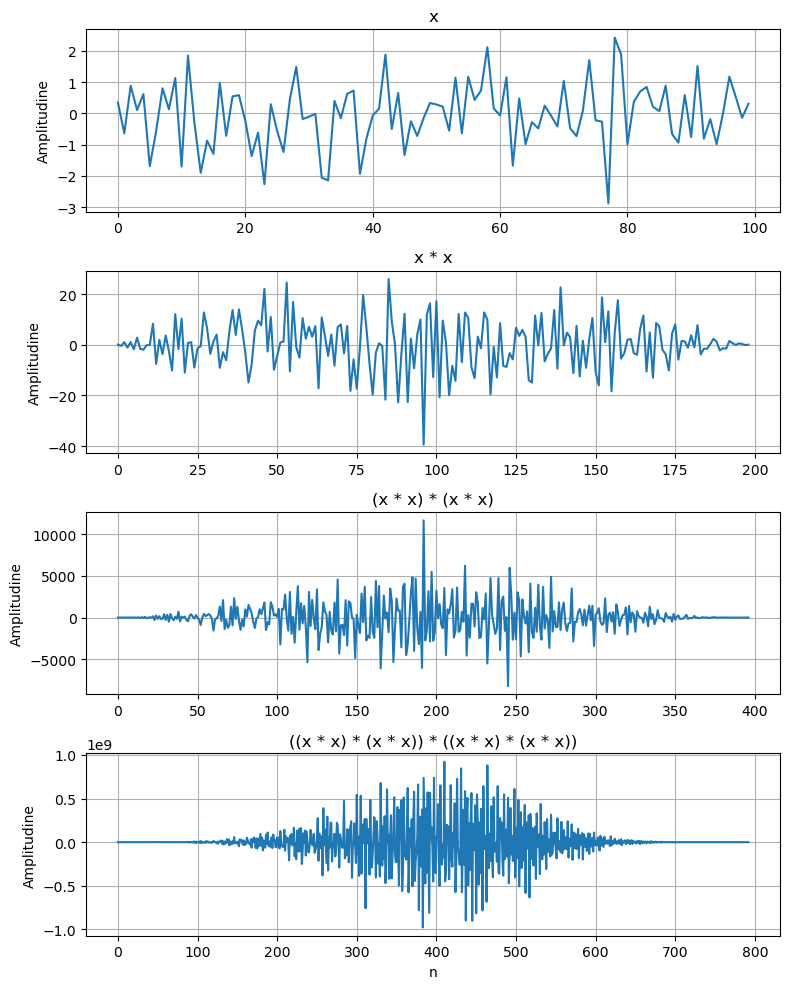

In [24]:
# EXERCITIUL 2
# generez un vector x[n] aleator cu N = 100 elemente
# calculez x = x * x de 3 ori
# afisez cele 4 grafice in aceeasi figura
# repet experimentul cu un semnal bloc rectangular (1 pe un interval scurt, 0 in rest)


# 1. semnal aleator
N= 100
x = np.random.randn(N)

x2 = np.convolve(x, x)
x3 = np.convolve(x2, x2)
x4 = np.convolve(x3, x3)

fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=False)

signals = [x, x2, x3, x4]
titles  = ["x", "x * x", "(x * x) * (x * x)", "((x * x) * (x * x)) * ((x * x) * (x * x))"]

for ax, sig, title in zip(axs, signals, titles):
    ax.plot(sig)
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylabel("Amplitudine")

axs[-1].set_xlabel("n")
plt.tight_layout()
plt.savefig("2_convolutii_repetate_x_aleator.pdf")
plt.show()

#--------------------------------------------------
#Ce observ: semnalul incepe sa semene cu o distributie Gaussiana
#                    isi dubleaza lungaimea 
#                    amplitudinea sa creste


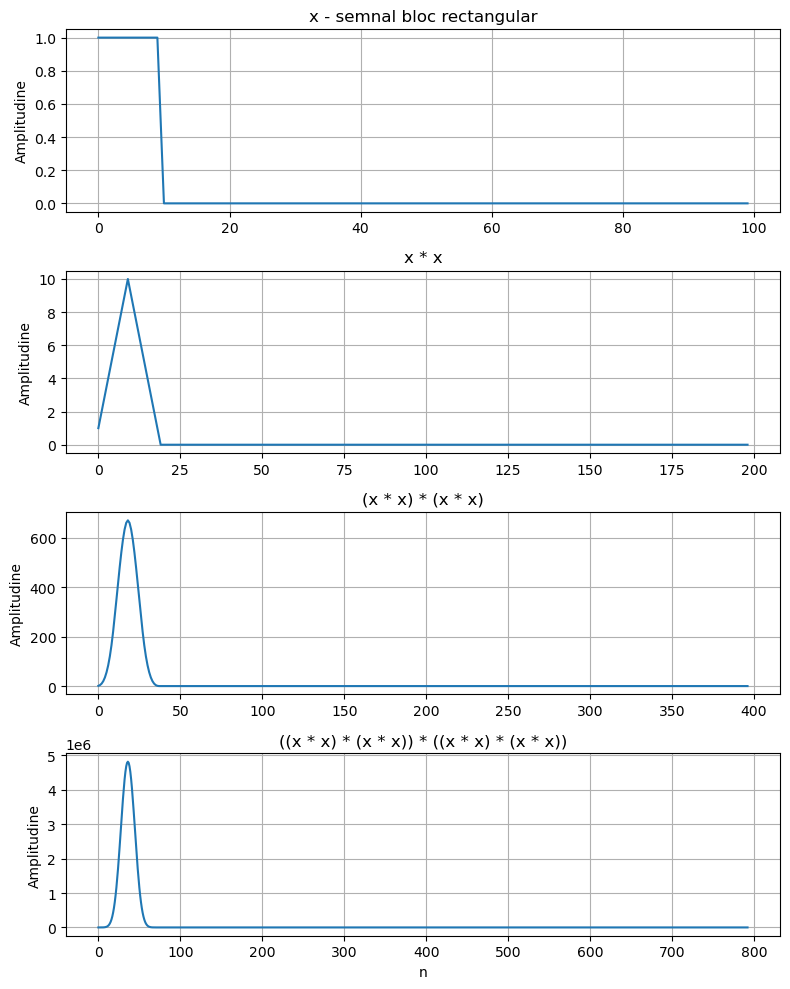

In [28]:
N = 100
L = 10  #lungimea blocului de valori de 1

x = np.zeros(N)
x[:L] = 1.0   #blocul de 1

x2 = np.convolve(x, x)
x3 = np.convolve(x2, x2)
x4 = np.convolve(x3, x3)

fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=False)

signals = [x, x2, x3, x4]
titles  = ["x - semnal bloc rectangular",
           "x * x",
           "(x * x) * (x * x)",
           "((x * x) * (x * x)) * ((x * x) * (x * x))"]

for ax, sig, title in zip(axs, signals, titles):
    ax.plot(sig)
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylabel("Amplitudine")

axs[-1].set_xlabel("n")
plt.tight_layout()
plt.savefig("2_convolutii_repetate_x_bloc_rectangular.pdf")
plt.show()

#--------------------------------------------------
#Ce observ: convolutia a doua semnale bloc rectangulare e un triunghi
#                    triunghiul se netezeste si ingusteaza pe masura ce repet convolutia, amplitudinea creste

In [ ]:
# EXERCITIUL 3
# 2 polinoame p si q, grad max N, generate aleator, coef intregi

# Vreau produsul r = p ori q
#1. direct
#2. cu convolutia
#3. cu fft

In [31]:
#1. direct

N = 10


p = np.random.randint(-10, 11, size=N+1) #coeficienti intregi intre -10 si 10
print("p", p)
q = np.random.randint(-10, 11, size=N+1)
print("q", q)

grad_max_r = 2 * N
r_direct = np.zeros(grad_max_r+ 1, dtype=int)

for i in range(N+1):
    for j in range(N+1):
        r_direct[i + j] += p[i] * q[j]

print("r", r_direct)

p [  1  -5  10  -9  -2  10   8  -9 -10   4   7]
q [-3  9  9  9 -9  8 10  3  6  1  5]
r [  -3   24  -66   81  -39   14 -153  285  148 -306 -135  179  256 -106
 -110   70   53  -10   -4   27   35]


In [35]:
#2. cu convolutia
print("p           ", p)
print("q           ", q)
r_convolutie = np.convolve(p, q)
print("r_convolutie", r_convolutie)

p            [  1  -5  10  -9  -2  10   8  -9 -10   4   7]
q            [-3  9  9  9 -9  8 10  3  6  1  5]
r_convolutie [  -3   24  -66   81  -39   14 -153  285  148 -306 -135  179  256 -106
 -110   70   53  -10   -4   27   35]


In [ ]:
#3. cu fft
#convolutie in timp = inmultire in frecventa

#Obs: 2 polinoame de grad N inmultite dau un polinom de grad 2N cu 2N + 1 coeficienti
# Setez parametrul n din fft la len(p) + len(q) - 1 pentru a face padding cu 0-uri 
#                                                       si a obtine numarul corect de coeficienti in rezultatul final
# Altfel fft va returna un vector de aceeasi lungime ca al celui mai lung semnal (aici 11), ceea ce nu e corect


#FFT fara zero-padding ar produce CONVOLUTIE CIRCULARA.
#Rezultatul NU are loc suficient pentru toti termenii, iar coeficientii care "depasesc" lungimea maxima sunt "impinsi" inapoi 
#                                                                                               si adunati peste inceputul vectorului

P = np.fft.fft(p, n=len(p) + len(q) - 1)
print(P)
print(len(P))
Q = np.fft.fft(q, n=len(p) + len(q) - 1)
print(Q)
print(len(Q))

R_fft = P * Q
print(R_fft)
r_fft = np.fft.ifft(R_fft)

# r_fft e (teoretic) real, dar din cauza FP trebuie sa aplic real
print("r_fft_real =", r_fft.real)


[  5.         +0.j          -1.58560562 -1.21552995j
  -0.16938277 -6.95244771j -14.10105556+14.08241245j
  33.6275782  +2.79293803j -19.12454827-39.96403694j
 -30.5595655 +24.15887694j   3.5       +16.45448267j
   2.15881764+17.87898215j  14.16062106+13.10665193j
  20.09314082 +7.49020717j  20.09314082 -7.49020717j
  14.16062106-13.10665193j   2.15881764-17.87898215j
   3.5       -16.45448267j -30.5595655 -24.15887694j
 -19.12454827+39.96403694j  33.6275782  -2.79293803j
 -14.10105556-14.08241245j  -0.16938277 +6.95244771j
  -1.58560562 +1.21552995j]
21
[ 48.         +0.j           1.9888404 -31.9664139j
  -0.25160427 -2.11713522j   7.0770239 -15.83833924j
  -4.73551984-22.94186674j -27.50104765-14.18518592j
 -18.66301396+13.97525201j   1.5       +12.99038106j
  15.12986359 -5.71727269j -12.41400993-23.02909771j
 -17.63053224 +1.71177228j -17.63053224 -1.71177228j
 -12.41400993+23.02909771j  15.12986359 +5.71727269j
   1.5       -12.99038106j -18.66301396-13.97525201j
 -27.50104765+14

In [ ]:
# EXERCITIUL 4

# vector aleator x de n = 20 elemente
#     care sa contina o functie esantionata de mine

# Aleg un nr intreg d si deplase circular vectorul cu d pozitii = y

# Folosind x si y trebuie sa recuperez deplasarea d folosind formula:

#a.      IFFT ( compl_conj FFT(x) . FFT(y) )
#b.      IFFT ( FFT(y) / FFT(x) )

def functie(n):
    return np.sin(2 * np.pi * 1 * n)

esantioane = np.arange(0, 20, 1)
x = functie(esantioane)
# print(x)

d = 7  # de ex.
y = np.roll(x, d) # deplasare circulara cu d pozitii
# print(y)

X = np.fft.fft(x)
Y = np.fft.fft(y)

corr = np.fft.ifft(np.conj(X) * Y) # imi calculeaza corelatia dintre x shiftat in toate modurile posibile (0,1,...,d,..N-1 pozitii) si y, 
                                    # caut apoi indicele care da maximul dintre toate acele corelatii (d)
print("Corelatii:", corr.real)

d_recuperat = np.argmax(corr.real)
print("Deplasarea:", d_recuperat)



print("-------------------")


corr2 = np.fft.ifft(Y / X)                      #impartirea Y/X ma scapa de X, raman doar cu informatia de shift dintre x si y (fazorul e^....)
                                                #acea exponentiala e DFT a unui impuls deplasat cu d pozitii
                                                #aplicand IFFT revin la domeniul timp, unde am un impuls deplasat cu d pozitii
                                                #caut apoi indicele care da maximul (d)
d_recuperat_2 = np.argmax(corr2.real)

print("Deplasarea (metoda 2):", d_recuperat_2)


# VEZI DEMONSTRATII PE FOAIE!


Corelatii: [ 1.45794844e-28  1.42134197e-29  1.20586751e-28  3.13453543e-28
  1.69791000e-28 -5.79653883e-29  1.54181370e-28  4.52821589e-28
  1.54181370e-28 -5.79653883e-29  1.69791000e-28  3.13453543e-28
  1.20586751e-28  1.42134197e-29  1.45794844e-28  1.93282422e-28
  1.06189057e-28  1.05589153e-28  1.06189057e-28  1.93282422e-28]
Deplasarea: 7
-------------------
Deplasarea (metoda 2): 7


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


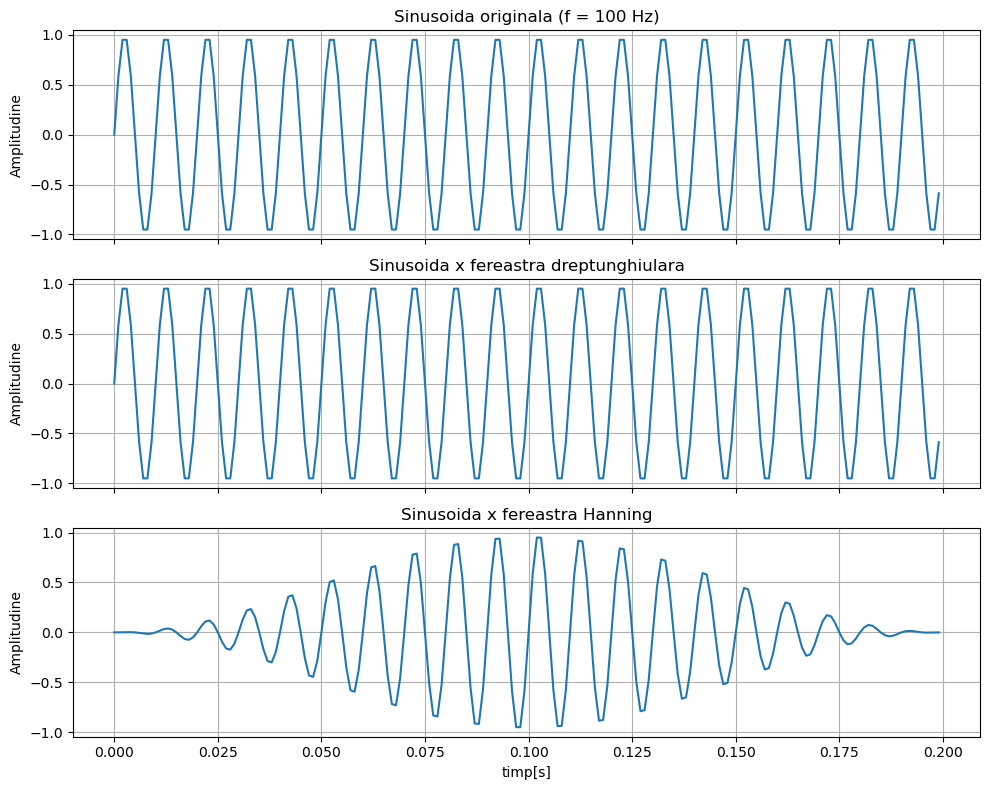

In [62]:
# EXERCITIUL 5

# fereastra dreptunghiulara
# fereastra Hanning

# functiile primesc ca parametru dimensiunea ferestrei

# afisez grafic o sinusoida trecuta prin cele 2 tipuri de ferestre de dim N_w = 200

def x(n):
    return np.sin(2 * np.pi * 100 * n)

def fereastra_dreptunghiulara(N):
    #toate valorile = 1
    return np.ones(N)

def fereastra_hanning(N):
    #0.5 * (1 - cos(2π n / N))."""
    n = np.arange(N)
    return 0.5 * (1 - np.cos(2 * np.pi * n / N))

N_w = 200
n = np.arange(N_w)  
print(n)

Fs = 1000
Ts = 1 / Fs

x_original = x(n*Ts) #semnal original esantionat


w_rect = fereastra_dreptunghiulara(N_w)
w_hann = fereastra_hanning(N_w)

x_rect = x_original * w_rect
x_hann = x_original * w_hann

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(n*Ts, x_original)
axs[0].set_title("Sinusoida originala (f = 100 Hz)")
axs[0].set_ylabel("Amplitudine")
axs[0].grid()

axs[1].plot(n*Ts, x_rect)
axs[1].set_title("Sinusoida x fereastra dreptunghiulara")
axs[1].set_ylabel("Amplitudine")
axs[1].grid()

axs[2].plot(n*Ts, x_hann)
axs[2].set_title("Sinusoida x fereastra Hanning")
axs[2].set_xlabel("timp[s]")
axs[2].set_ylabel("Amplitudine")
axs[2].grid()

plt.savefig("5_ferestre.pdf")
plt.tight_layout()
plt.show()


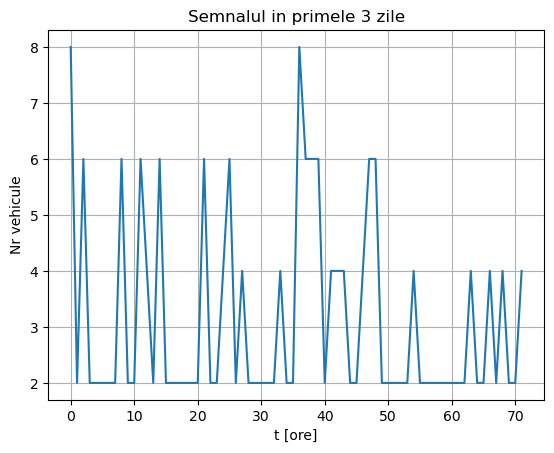

In [5]:
# EXERCITIUL 6

import pandas as pd

#a

df = pd.read_csv("Train.csv")

x = df["Count"].values # doar coloana cu traficul

fs = 1 #pe ora
Ts = 1

x_3_zile = x[:3*24]

t = np.arange(len(x_3_zile)) * Ts   # timpul în ore

plt.figure()
plt.plot(t, x_3_zile)
plt.xlabel("t [ore]")
plt.ylabel("Nr vehicule")
plt.title("Semnalul in primele 3 zile")
plt.grid(True)
plt.savefig("6_a_semnal_in_primele_3_zile.pdf")
plt.show()

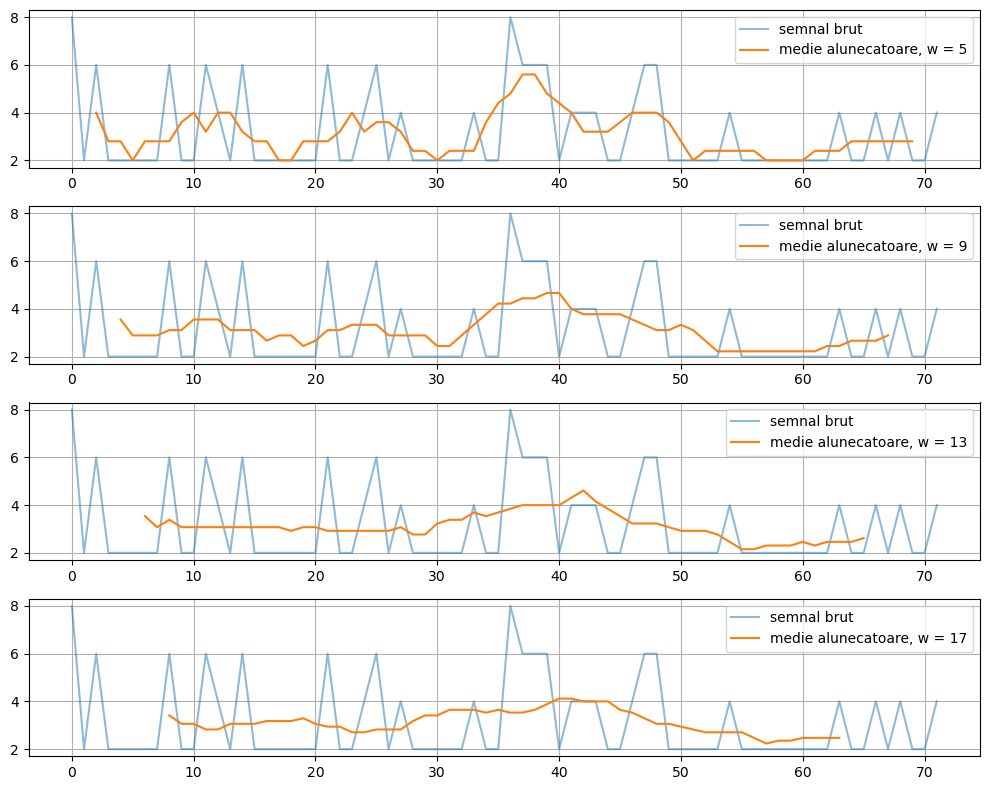

In [6]:
#b
#filtru de tip medie alunecatoare pt a netezi semnalul
# setez dim diferite ale ferestrei: w = 5,9,13,17

windows = [5, 9, 13, 17]

plt.figure(figsize=(10, 8))

for i, w in enumerate(windows, 1):
    x_ma = np.convolve(x_3_zile, np.ones(w), 'valid') / w
    t_ma = np.arange(len(x_ma)) + (w-1)//2 
    #adun jumatate din lungimea ferestrei pentru ca prima valoare de medie produsa corespunde esantionului w-1/2
    
    plt.subplot(len(windows), 1, i)
    plt.plot(t , x_3_zile, label="semnal brut", alpha=0.5)
    plt.plot(t_ma, x_ma, label=f"medie alunecatoare, w = {w}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.savefig("6_b_medie_alunecatoare.pdf")
plt.show()

In [7]:
#c filtrare frecvente inalte cu filtru trece-jos
#frecv de taiere? de ce?

# f_taiere in Hz si pe 0-1=Nyquist

fs = 1 # 1 ciclu pe ora
print("fs:", fs, "cicluri/ora")
fs_Hz = 1/3600 #Hz

f_Nyquist = fs/2 #cea mai mare frecventa pe care o pot detecta in semnal
f_Nyquist_Hz = fs_Hz/2
print("f_Nyquist:", f_Nyquist, "cicluri/ora")


# Traficul are variatie puternica la scara de o zi (24h)
f_zi = 1/24
f_zi_Hz = 1/(24*3600)
print("f_zi:", f_zi, "cicluri/ora") #0.041(6)

#O sa elimin toate frecventele mai mari de 0.1 cicluri/ora              = 1 ciclu/10 ore = un ev. periodic cu perioada 10 ore
#                                       (o frecventa putin mai mare decat frecventa pe zi)

f_cut = 0.1
f_cut_Hz = 0.1/3600
print("-------------------")
print("f_cut:", f_cut, "cicluri/ora")
print("f_cut_Hz:", f_cut_Hz, "Hz")


f_cut_normalizat = f_cut/f_Nyquist
f_cut_normalizat_Hz = f_cut_Hz/f_Nyquist_Hz
print("-------------------")
print("f_cut_normalizat:", f_cut_normalizat, "cicluri/ora")         #0.2
print("f_cut_normalizat_Hz:", f_cut_normalizat_Hz, "Hz")


fs: 1 cicluri/ora
f_Nyquist: 0.5 cicluri/ora
f_zi: 0.041666666666666664 cicluri/ora
-------------------
f_cut: 0.1 cicluri/ora
f_cut_Hz: 2.777777777777778e-05 Hz
-------------------
f_cut_normalizat: 0.2 cicluri/ora
f_cut_normalizat_Hz: 0.2 Hz


Filtrul Butterworth are un r˘aspuns platˆın banda de trecere (f˘ar˘a ondulat,
 ii),
 ˆın schimb compenseaz˘a cu o tranzit,
 ie foarte lent˘a. Din acest motiv este util acolo
 unde este necesar ca semnalul s˘a nu fie deloc distorsionat de operat,
 ia de filtrare,
 spre exemplu ca procedur˘a de anti-aliere sauˆın aplicat,
 ii audio. Filtrul Cebyshev
 se foloses,
 te,ˆıns˘a, acolo unde mai importante decˆat amplitudinea semnalului sunt
 componentele de frecvent,
 ˘a.

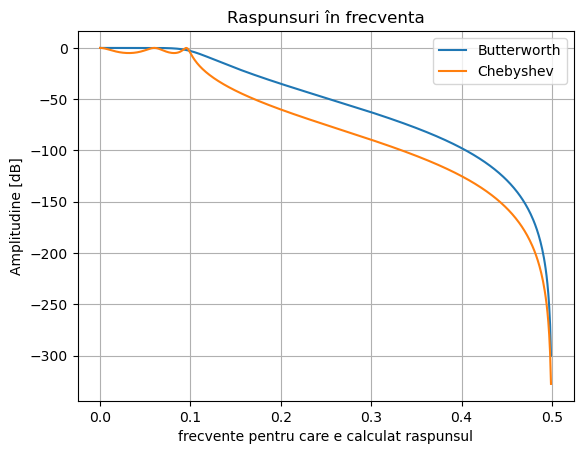

In [8]:
#d. proiectez filtrele Butterworth si Chebyshev de ordin 5
# frecv de taiere = Wn

#atenuarea ondulatiilor rp = 5dB
#apoi alte valori

import scipy.signal as sig

Wn = f_cut_normalizat_Hz
rp = 5
N=5

# Filtru Butterworth
b_butt, a_butt = sig.butter(N, Wn, btype='low') #returneaza b = coeficientii numaratorului, a = coef. numitorului

# Filtru Chebyshev 
b_cheb, a_cheb = sig.cheby1(N, rp, Wn, btype='low')

#raspunsurile in frecventa
w, H_butt = sig.freqz(b_butt, a_butt) # returneaza un vector w = frecventele pt care e calculat raspunsul (normalizate in intervalul 0-pi)
                                    #                        h = numere complexe = raspunsul in frecventa
w, H_cheb = sig.freqz(b_cheb, a_cheb)

plt.figure()
plt.plot(w/np.pi*fs/2, 20*np.log10(np.abs(H_butt)), label="Butterworth") 
    #denormalizare a frecventelor -> le aduc in cicluri/ora intre 0 si Nyquist
plt.plot(w/np.pi*fs/2, 20*np.log10(np.abs(H_cheb)), label="Chebyshev")
plt.xlabel("frecvente pentru care e calculat raspunsul")
plt.ylabel("Amplitudine [dB]")
plt.title("Raspunsuri în frecventa")
plt.grid(True)
plt.legend()
plt.savefig("6_d_filtre_cheb_si_butter.pdf")
plt.show()

#las sa treaca doar frecventele < 0.1 cicluri/ora

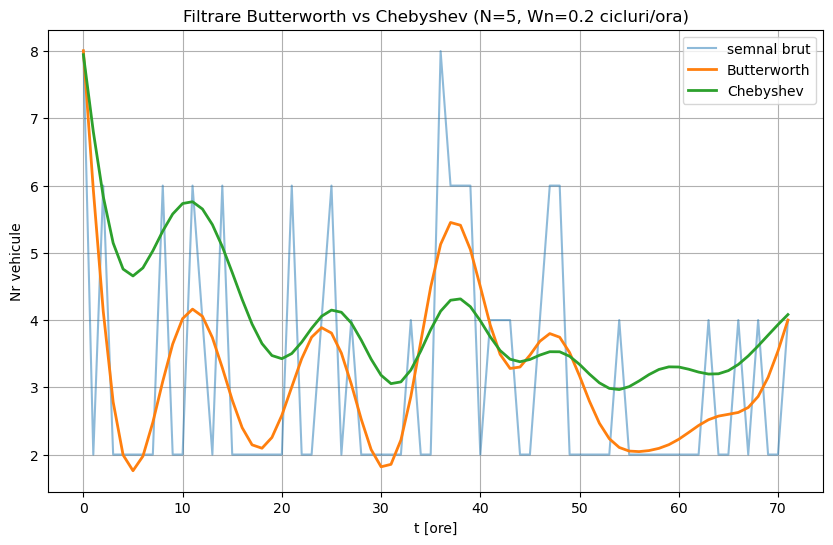

In [9]:
x_butt = sig.filtfilt(b_butt, a_butt, x_3_zile)
x_cheb = sig.filtfilt(b_cheb, a_cheb, x_3_zile)

plt.figure(figsize=(10, 6))
plt.plot(t, x_3_zile, label="semnal brut", alpha=0.5)
plt.plot(t, x_butt, label="Butterworth", linewidth=2)
plt.plot(t, x_cheb, label="Chebyshev", linewidth=2)
plt.xlabel("t [ore]")
plt.ylabel("Nr vehicule")
plt.title("Filtrare Butterworth vs Chebyshev (N=5, Wn=0.2 cicluri/ora)")
plt.grid(True)
plt.legend()
plt.savefig("6_e_filtrare_semnal.pdf")
plt.show()

#Filtrul Chebyshev taie mai bine frecventele inalte.
#Are panta de tranzitie mai abrupta intre banda de trecere si banda de stop

#! Filtrul Chebyshev se foloseste unde componentele de frecventa sunt mai importante decat amplitudinea semnalului 
# (eu vreau sa scot frecv inalte)


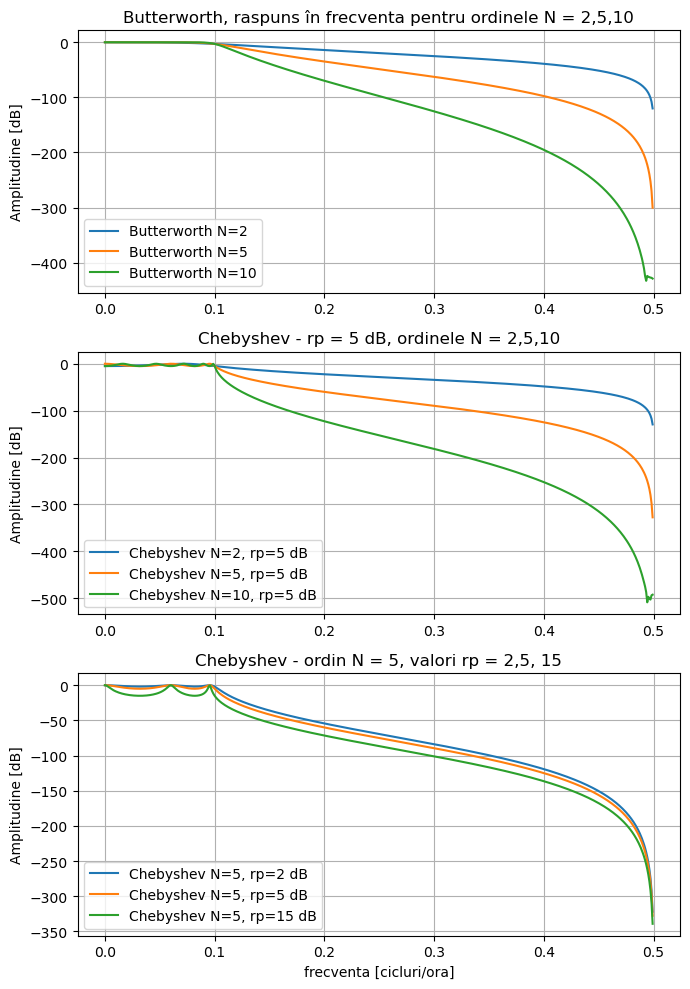

In [10]:
#f

#reproiectez filterele alegand un ordin mai mic/mai mare

#Cheb cu alte avlori ale rp

#Valori optime pt a - mi atinge scopul = a filtra frecventele inalte?

Wn = f_cut_normalizat_Hz
ordine = [2, 5,10]


plt.figure(figsize=(7, 10))

# 1) BUTTERWORTH (ord = 3,5,7)
plt.subplot(3, 1, 1)

for N in ordine:
    b, a = sig.butter(N, Wn, btype='low')
    w, H = sig.freqz(b, a)
    plt.plot(w/np.pi * (fs/2), 20*np.log10(np.abs(H)), label=f"Butterworth N={N}")

plt.title("Butterworth, raspuns în frecventa pentru ordinele N = 2,5,10")
plt.ylabel("Amplitudine [dB]")
plt.grid(True)
plt.legend()




# 2) CHEBYSHEV (rp = 5 dB, ord = 3,5,7)
plt.subplot(3, 1, 2)

rp = 5
for N in ordine:
    b, a = sig.cheby1(N, rp, Wn, btype='low')
    w, H = sig.freqz(b, a)
    plt.plot(w/np.pi * (fs/2), 20*np.log10(np.abs(H)), label=f"Chebyshev N={N}, rp=5 dB")

plt.title("Chebyshev - rp = 5 dB, ordinele N = 2,5,10")
plt.ylabel("Amplitudine [dB]")
plt.grid(True)
plt.legend()


# 3) CHEBYSHEV (N = 5, rp = 3,5,7)
plt.subplot(3, 1, 3)

N = 5
rps = [2,5,15]
for rp in rps:
    b, a = sig.cheby1(N, rp, Wn, btype='low')
    w, H = sig.freqz(b, a)
    plt.plot(w/np.pi * (fs/2), 20*np.log10(np.abs(H)),label=f"Chebyshev N=5, rp={rp} dB")

plt.title("Chebyshev - ordin N = 5, valori rp = 2,5, 15")
plt.xlabel("frecventa [cicluri/ora]")
plt.ylabel("Amplitudine [dB]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("6_f_filtre_reproiectate_cu_ordine_diferite")
plt.show()


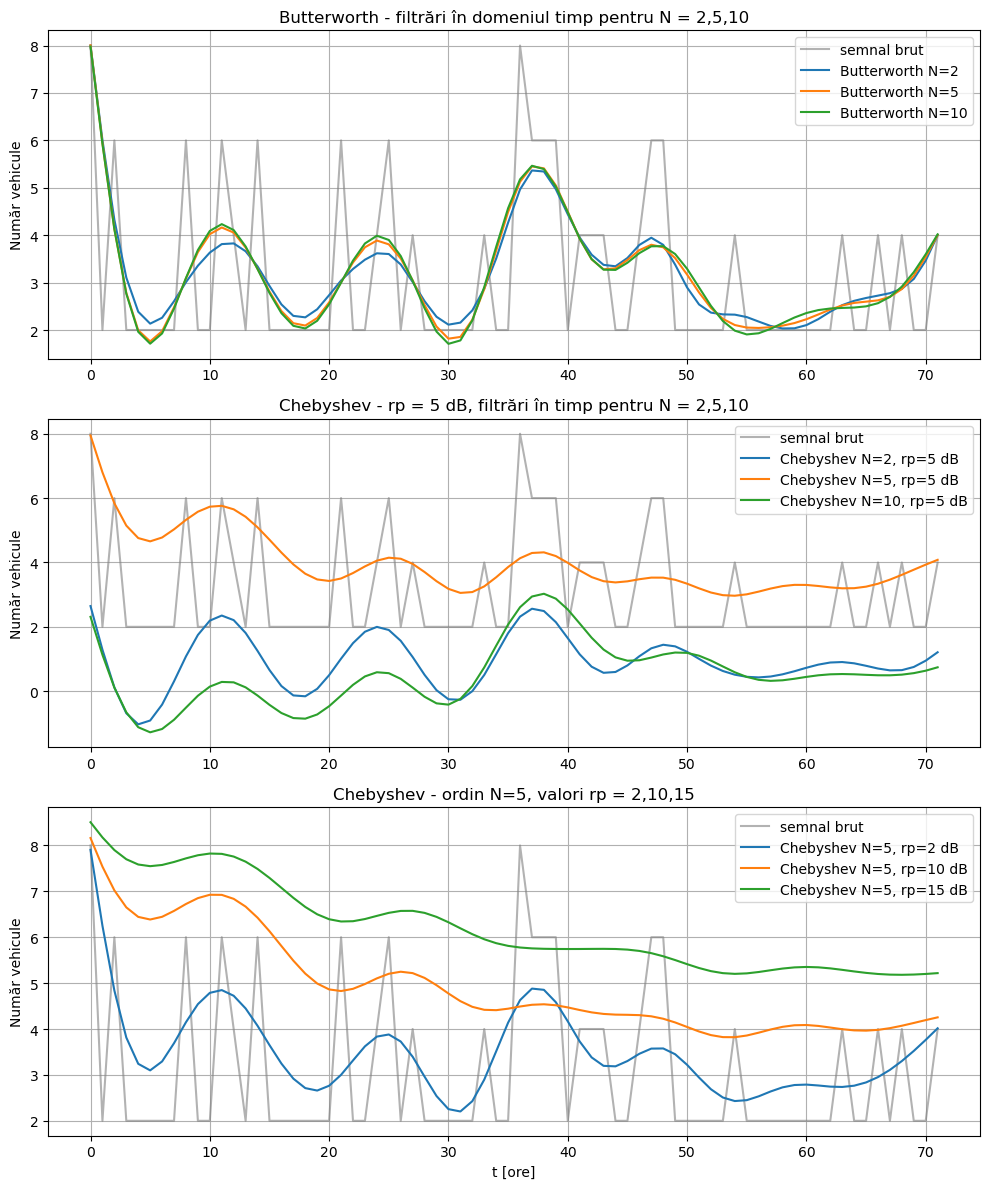

In [ ]:
# SEMNALE FILTARTE CU DIFERITE CONFIGURATII ALE FILTRELOR

Wn = f_cut_normalizat_Hz
ordine = [2, 5, 10]

plt.figure(figsize=(10, 12))


#1. BUTTERWORTH, semnal filtrat pentru N = 2,5,10

plt.subplot(3, 1, 1)

plt.plot(t, x_3_zile, label="semnal brut", color="gray", alpha=0.6)

for N in ordine:
    b, a = sig.butter(N, Wn, btype="low")
    x_f = sig.filtfilt(b, a, x_3_zile)   # filtrare fără întârziere
    plt.plot(t, x_f, label=f"Butterworth N={N}")

plt.title("Butterworth - filtrări în domeniul timp pentru N = 2,5,10")
plt.ylabel("Număr vehicule")
plt.grid(True)
plt.legend()



# 2. CHEBYSHEV – rp = 5 dB, ordine N = 2,5,10
plt.subplot(3, 1, 2)

plt.plot(t, x_3_zile, label="semnal brut", color="gray", alpha=0.6)

rp = 5
for N in ordine:
    b, a = sig.cheby1(N, rp, Wn, btype="low")
    x_f = sig.filtfilt(b, a, x_3_zile)
    plt.plot(t, x_f, label=f"Chebyshev N={N}, rp=5 dB")

plt.title("Chebyshev - rp = 5 dB, filtrări în timp pentru N = 2,5,10")
plt.ylabel("Număr vehicule")
plt.grid(True)
plt.legend()


# 3. CHEBYSHEV – ordin N=5, rp = 5,10,15

plt.subplot(3, 1, 3)

plt.plot(t, x_3_zile, label="semnal brut", color="gray", alpha=0.6)

N = 5
rps = [2, 10, 15]
for rp in rps:
    b, a = sig.cheby1(N, rp, Wn, btype="low")
    x_f = sig.filtfilt(b, a, x_3_zile)
    plt.plot(t, x_f, label=f"Chebyshev N=5, rp={rp} dB")

plt.title("Chebyshev - ordin N=5, valori rp = 2,10,15")
plt.xlabel("t [ore]")
plt.ylabel("Număr vehicule")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("6_f_filtrare_cu_filtre_reproiectate.pdf")


# CEL MAI BINE: CEBISEV(N=5, rp=5) sau (N=5, rp=2)     N prea mare => ripple in banda de stop
                                                        #rp prea mare => ripple in banda de trecere
                                                        #Compromis intre panta abrupta de la banda de trecere la banda de stop si ripple
